In [10]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 20,10

---

In [11]:
#Dataset
os.chdir('/Users/shanthosh/Documents/Data')
gross = pd.read_csv('Section6-Homework-Data.csv', encoding = 'latin1')
gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
Day of Week               608 non-null object
Director                  608 non-null object
Genre                     608 non-null object
Movie Title               608 non-null object
Release Date              608 non-null object
Studio                    608 non-null object
Adjusted Gross ($mill)    608 non-null object
Budget ($mill)            608 non-null float64
Gross ($mill)             608 non-null object
IMDb Rating               608 non-null float64
MovieLens Rating          608 non-null float64
Overseas ($mill)          608 non-null object
Overseas%                 608 non-null float64
Profit ($mill)            608 non-null object
Profit%                   608 non-null float64
Runtime (min)             608 non-null int64
US ($mill)                608 non-null float64
Gross % US                608 non-null float64
dtypes: float64(7), int64(1), object(10)
memory usage: 85.6+ 

---

In [12]:
#Project: Create a chart that compares Genre, Gross % US and Studio

---

In [13]:
#Step 1: Create a table with only these cols

In [14]:
#Set new col name 
gross.columns = ['DOW', 'Director', 'Genre', 'Movie', 'Release', 'Studio', 'AdjGross','Budget', 'Gross', 'IMDb', 'MovieLens','Oversees','PerOverseas', 'Profit', 'PerProfit', 'Runtime', 'US', 'USGross']


#Problem 1: I need to get certain genres => action, comedy, adventure, animation, drama
#Problem 2: I need to get certain Studios => Buena, Sony, Universal, WB, Paramount Pictures, Fox


#Solution: Store values in a list
genreList = ['action', 'comedy', 'adventure', 'animation', 'drama']
studioList = ['Buena Vista Studios', 'Sony', 'Universal', 'WB', 'Paramount Pictures', 'Fox']

#Get Gross % US
wantedGross = []

#Filter using loops
for x in genreList:
    for y in studioList:
        for i in range(len(gross.USGross)):
            if (x == gross.Genre[i]) & (y == gross.Studio[i]):
                wantedGross.append(gross.USGross[i])
                
len(wantedGross)

423

In [15]:
#Filter using isin()
newGenre = gross[gross.Genre.isin(genreList)]
newGross = newGenre[newGenre.Studio.isin(studioList)]

In [16]:
len(newGross)

423

---

In [17]:
#Step 3: Create boxplot and scatterplot representation in one graph

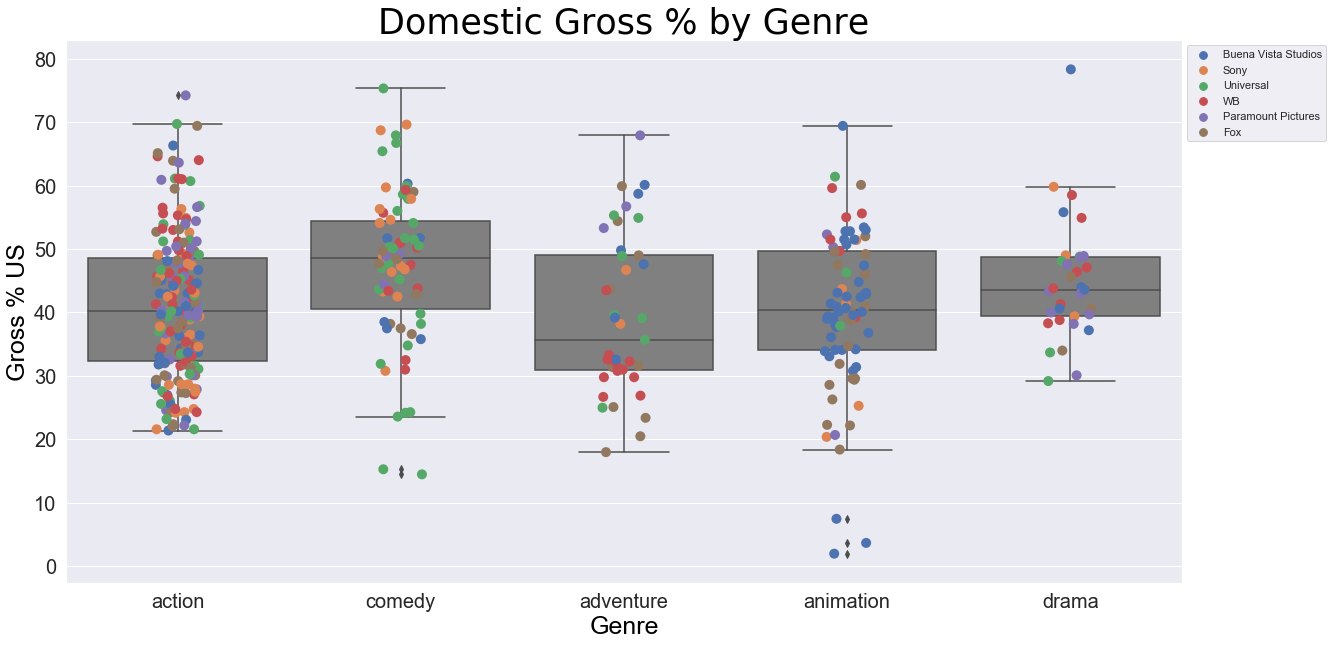

In [18]:
#boxplot
sns.set(style='darkgrid', color_codes=True)

ax = sns.boxplot(data=newGross, x='Genre', y='USGross', color='Grey')
sns.stripplot(data=newGross, x='Genre', y='USGross', hue='Studio', size=10)
plt.title('Domestic Gross % by Genre', fontsize=35, color='Black', fontname='Avenir')
plt.ylabel('Gross % US', fontsize=25, color='Black')
plt.xlabel('Genre', fontsize=25, color='Black')
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.legend(bbox_to_anchor=(1,1), loc=2)
plt.show()
